In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#Preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
# Modelling
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error,root_mean_squared_log_error
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/stud.csv')

In [4]:
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = np.round(df['total score']/3, 3)

In [5]:
df.columns=df.columns.str.replace(' ','_').str.replace('/','_')

In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.667
1,female,group C,some college,standard,completed,69,90,88,247,82.333
2,female,group B,master's degree,standard,none,90,95,93,278,92.667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333
4,male,group C,some college,standard,none,76,78,75,229,76.333


In [7]:
X = df.drop(columns=['average', 'total_score','reading_score'],axis=1)

In [8]:
y = df.average.copy()

In [9]:
y.head()

0    72.667
1    82.333
2    92.667
3    49.333
4    76.333
Name: average, dtype: float64

In [10]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", OneHotEncoder(), cat_features),
         ("StandardScaler", StandardScaler(), num_features),        
    ]
)

In [11]:
X_pre = preprocessor.fit_transform(X)

In [12]:
X_pre.shape

(1000, 19)

In [13]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X_pre,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((800, 19), (200, 19))

In [14]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmsle = root_mean_squared_log_error(true, predicted)
    r2_square = r2_score(true, predicted)
    return mae, mse, rmsle, r2_square

In [15]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "SVR": SVR(kernel='linear'),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

In [16]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_rmsle, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_rmsle, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Mean Absolute Error: {:.3f}".format(model_train_mae))
    print("- Root Mean Squared Error: {:.3f}".format(model_train_rmse))
    print("- Root Mean Squared Log Error: {:.3f}".format(model_train_rmsle))
    print("- R2 Score: {:.3f}".format(model_train_r2))

    print('-'*25)
    
    print('Model performance for Test set')
    print("- Mean Absolute Error: {:.3f}".format(model_test_mae))
    print("- Root Mean Squared Error: {:.3f}".format(model_test_rmse))
    print("- Root Mean Squared Log Error: {:.3f}".format(model_test_rmsle))
    print("- R2 Score: {:.3f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Absolute Error: 1.042
- Root Mean Squared Error: 1.667
- Root Mean Squared Log Error: 0.021
- R2 Score: 0.992
-------------------------
Model performance for Test set
- Mean Absolute Error: 1.165
- Root Mean Squared Error: 2.066
- Root Mean Squared Log Error: 0.025
- R2 Score: 0.990


Lasso
Model performance for Training set
- Mean Absolute Error: 1.395
- Root Mean Squared Error: 2.983
- Root Mean Squared Log Error: 0.029
- R2 Score: 0.985
-------------------------
Model performance for Test set
- Mean Absolute Error: 1.490
- Root Mean Squared Error: 3.568
- Root Mean Squared Log Error: 0.040
- R2 Score: 0.983


Ridge
Model performance for Training set
- Mean Absolute Error: 1.041
- Root Mean Squared Error: 1.666
- Root Mean Squared Log Error: 0.021
- R2 Score: 0.992
-------------------------
Model performance for Test set
- Mean Absolute Error: 1.162
- Root Mean Squared Error: 2.057
- Root Mean Squared Log Error: 0.025
- R2 S

In [17]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.990404
0,Linear Regression,0.990364
7,SVR,0.990245
6,XGBRegressor,0.984805
5,Random Forest Regressor,0.984592
1,Lasso,0.983356
8,AdaBoost Regressor,0.978880
4,Decision Tree,0.972213
3,K-Neighbors Regressor,0.919519


#### Linear Regression

In [18]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score:.3f} %")

Accuracy of the model is 99.036 %


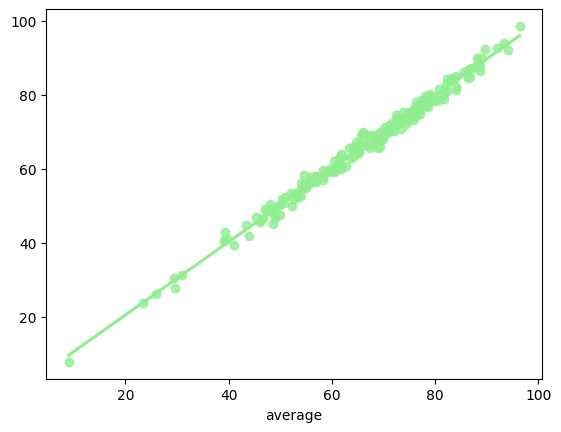

In [19]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='lightgreen');

In [20]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df.sample(10)

,Actual Value,Predicted Value,Difference
692,73.667,75.343750,-1.676750
549,73.333,73.085938,0.247062
107,64.333,64.679688,-0.346688
328,78.000,78.671875,-0.671875
314,66.000,68.515625,-2.515625
218,71.000,69.859375,1.140625
678,78.000,79.625000,-1.625000
486,54.667,58.398438,-3.731437
521,87.000,87.085938,-0.085938
365,55.667,56.187500,-0.520500


In [21]:
df.to_csv('New_data.csv',index=False)